In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import boxcox, shapiro, skew

In [2]:
data = pd.read_csv("Data/titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Describing numerical features
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
# Describing categorical features
data.describe(include = ['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


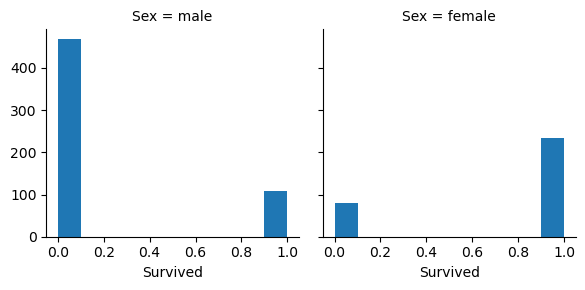

In [5]:
g = sns.FacetGrid(data, col = 'Sex')
g.map(plt.hist, 'Survived')
plt.show()

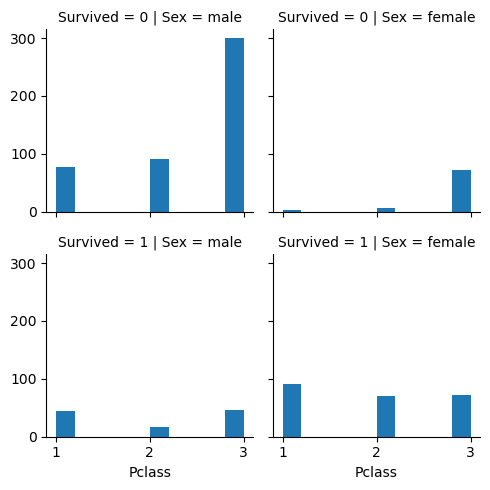

In [6]:
g = sns.FacetGrid(data, col = 'Sex', row='Survived', height = 2.5)
g.map(plt.hist, 'Pclass', bins = 10)
plt.show()

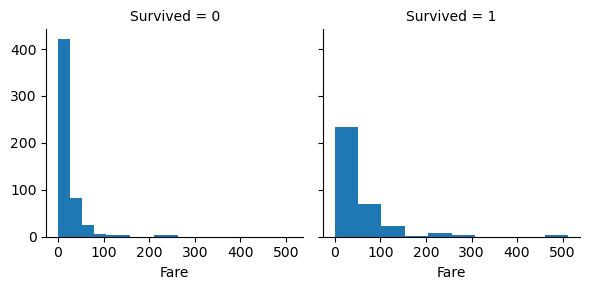

In [7]:
g = sns.FacetGrid(data, col = 'Survived')
g.map(plt.hist, 'Fare')
plt.show()

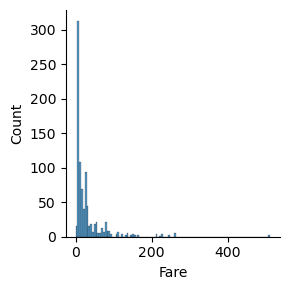

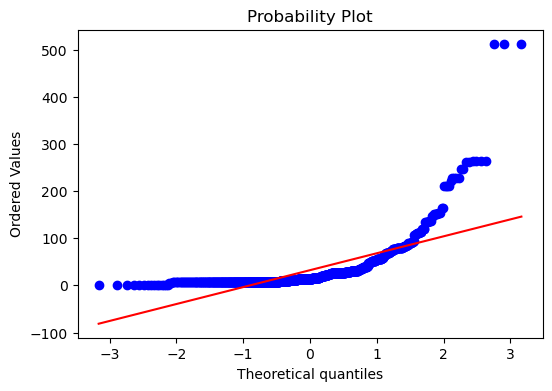

In [8]:
sns.displot(data['Fare'], height = 3)
fig = plt.figure(figsize = (6,4))
res = stats.probplot(data['Fare'], plot = plt)

In [9]:
(mu, sigma) = stats.norm.fit(data[data['Age'].notnull()]['Age'])
mu, sigma

(29.69911764705882, 14.516321150817316)

In [10]:
data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

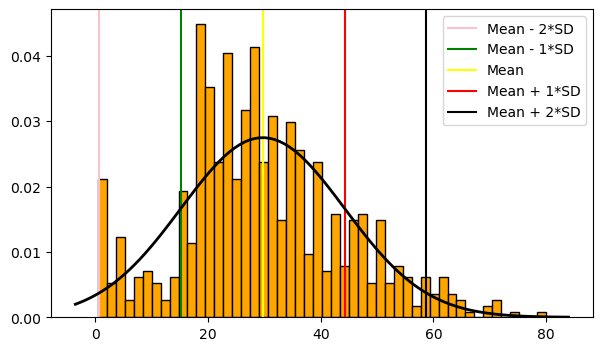

In [11]:
plt.figure(figsize = (7, 4))
plt.hist(data['Age'], bins = 50, edgecolor = 'black', color = 'orange', density = True)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, sigma)

plt.axvline(x = mu - 2*sigma, color = 'Pink', label = 'Mean - 2*SD')
plt.axvline(x = mu - sigma, color = 'Green', label = 'Mean - 1*SD')
plt.axvline(x = mu, color = 'Yellow', label = 'Mean')
plt.axvline(x = mu + sigma, color = 'red', label = 'Mean + 1*SD')
plt.axvline(x = mu + 2*sigma, color = 'Black', label = 'Mean + 2*SD')

plt.plot(x, p, 'k', linewidth = 2)

plt.legend()
plt.show()

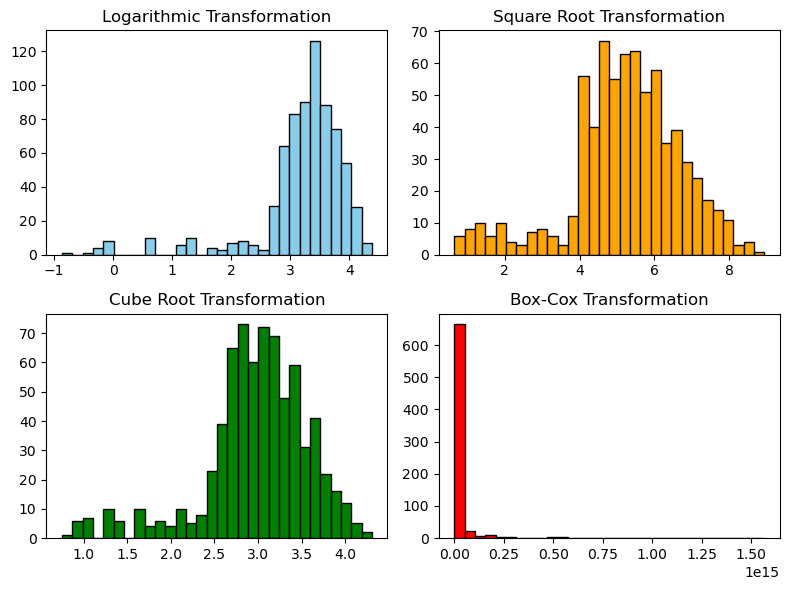

In [12]:
# Assuming data is your DataFrame containing the 'age' column

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))

# Logarithmic transformation
data['age_log'] = np.log(data['Age'])
axes[0, 0].hist(data['age_log'], bins=30, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Logarithmic Transformation')

# Square root transformation
data['age_sqrt'] = np.sqrt(data['Age'])
axes[0, 1].hist(data['age_sqrt'], bins=30, color='orange', edgecolor='black')
axes[0, 1].set_title('Square Root Transformation')

# Cube root transformation
data['age_cbrt'] = np.cbrt(data['Age'])
axes[1, 0].hist(data['age_cbrt'], bins=30, color='green', edgecolor='black')
axes[1, 0].set_title('Cube Root Transformation')

# Box-Cox transformation
data['age_boxcox'], _ = boxcox(data['Age'])
axes[1, 1].hist(data['age_boxcox'], bins=30, color='red', edgecolor='black')
axes[1, 1].set_title('Box-Cox Transformation')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [13]:
for col in ['age_boxcox', 'Age', 'age_sqrt', 'age_cbrt', 'age_log']:
    sk_val = np.round(skew(data[data[col].notnull()][col]), 3)
    if sk_val < 0.1:
        print(sk_val, "\t", "left_skewed", "\t", col)
    elif sk_val > 0.1:
        print(sk_val, "\t", "right_skewed", "\t", col)
    else:
        print(sk_val, "\t", "symmetric", "\t", col)

11.013 	 right_skewed 	 age_boxcox
0.388 	 right_skewed 	 Age
-0.66 	 left_skewed 	 age_sqrt
-1.134 	 left_skewed 	 age_cbrt
-2.295 	 left_skewed 	 age_log


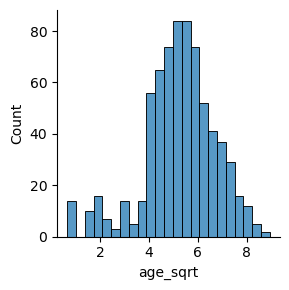

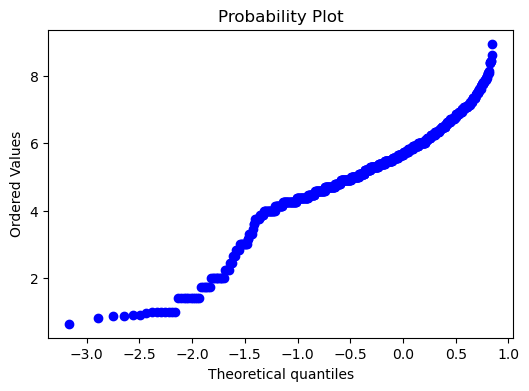

In [14]:
sns.displot(data['age_sqrt'], height = 3)
fig = plt.figure(figsize = (6,4))
res = stats.probplot(data['age_sqrt'], plot = plt)

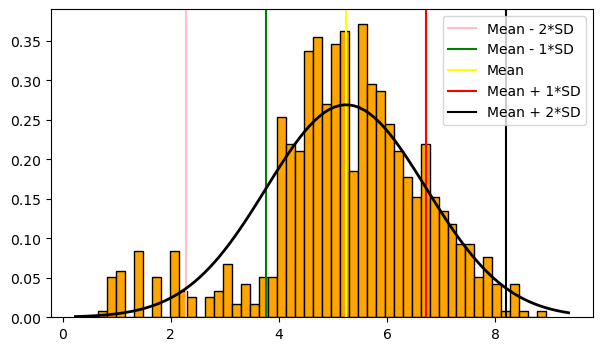

In [15]:
plt.figure(figsize = (7, 4))
plt.hist(data['age_sqrt'], bins = 50, edgecolor = 'black', color = 'orange', density = True)

(mu, sigma) = stats.norm.fit(data[data['age_sqrt'].notnull()]['age_sqrt'])

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, sigma)

plt.axvline(x = mu - 2*sigma, color = 'Pink', label = 'Mean - 2*SD')
plt.axvline(x = mu - sigma, color = 'Green', label = 'Mean - 1*SD')
plt.axvline(x = mu, color = 'Yellow', label = 'Mean')
plt.axvline(x = mu + sigma, color = 'red', label = 'Mean + 1*SD')
plt.axvline(x = mu + 2*sigma, color = 'Black', label = 'Mean + 2*SD')

plt.plot(x, p, 'k', linewidth = 2)

plt.legend()
plt.show()